## Classifying NBA Player Positions by K-Means Clustering



### Step 1: Analyze and Clean the Data

The data will need to be analyzed, cleaned, and prepared for the K-Means Clustering.

In [2]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [3]:
#Read in the data to a DataFrame
nba_player_data = pd.read_csv('nba_player_data_2020.csv')

In [5]:
#Print the .head() of the DataFrame for a sanity check
print(nba_player_data.head())

#Print the .info() of the DataFrame for a deeper investigation
print(nba_player_data.info())

  Team No.            Player Pos   Ht   Wt        Birth Date Country Exp  \
0  MIL  11       Brook Lopez   C  7-0  282     April 1, 1988      us  12   
1  MIL   9   Wesley Matthews  SG  6-4  220  October 14, 1986      us  11   
2  MIL  24   Pat Connaughton  SG  6-5  209   January 6, 1993      us   5   
3  MIL   0  Donte DiVincenzo  SG  6-4  203  January 31, 1997      us   2   
4  MIL  42       Robin Lopez   C  7-0  281     April 1, 1988      us  12   

      College  
0    Stanford  
1   Marquette  
2  Notre Dame  
3   Villanova  
4    Stanford  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team        510 non-null    object
 1   No.         489 non-null    object
 2   Player      510 non-null    object
 3   Pos         510 non-null    object
 4   Ht          510 non-null    object
 5   Wt          510 non-null    int64 
 6   Birth Date  510 n

As shown, the 'Ht' column is not an integer and will be difficult for computation. We will convert this to inches in a new column named 'Ht_Inches'.

In [23]:
#Create a 'Ft' column which takes the first digit in the 'Ht' column and converts it to an integer
nba_player_data['Ft'] = nba_player_data['Ht'].str[:1].astype(int)

#Create a 'In' column which takes the second digits in the 'Ht' column and converts it to an integer
nba_player_data['In'] = nba_player_data['Ht'].str.split('-').str[1].astype(int)

#Create a 'Ht_Inches' column and convert the 'Ht' column to inches
nba_player_data['Ht_Inches'] = (nba_player_data['Ft']*12)+nba_player_data['In']

In [25]:
#Print the .head() of the DataFrame to check if the calculation was successful
print(nba_player_data.head())

  Team No.            Player Pos   Ht   Wt        Birth Date Country Exp  \
0  MIL  11       Brook Lopez   C  7-0  282     April 1, 1988      us  12   
1  MIL   9   Wesley Matthews  SG  6-4  220  October 14, 1986      us  11   
2  MIL  24   Pat Connaughton  SG  6-5  209   January 6, 1993      us   5   
3  MIL   0  Donte DiVincenzo  SG  6-4  203  January 31, 1997      us   2   
4  MIL  42       Robin Lopez   C  7-0  281     April 1, 1988      us  12   

      College  Ft  In  Ht_Inches  
0    Stanford   7   0         84  
1   Marquette   6   4         76  
2  Notre Dame   6   5         77  
3   Villanova   6   4         76  
4    Stanford   7   0         84  


Next, let's look at the unique positions in the dataset. 

In [8]:
#Print out the unique values in the 'Pos' column
print(nba_player_data['Pos'].unique())

['C' 'SG' 'PF' 'SF' 'PG' 'G' 'F' 'F-G' 'G-F' 'F-C']


There are are 10 unique positions in the dataset. Since we only want to focus our analysis on the traditional five positions (C, SG, PF, SF, PG), let's see how many players fall into the non-traditional positions and if it is significant enough to keep for our analysis.

In [9]:
#Print out the value counts for each position
print(nba_player_data['Pos'].value_counts())

SG     130
PF     100
C       92
SF      85
PG      84
F        8
G        7
G-F      2
F-G      1
F-C      1
Name: Pos, dtype: int64


Since there are only 19 players that fall within those categories, we will remove them from our dataset.

In [14]:
#Remove F, G, G-F, F-G, and F-C from our dataframe
nba_player_data = (nba_player_data[(nba_player_data['Pos'] != 'F') & (nba_player_data['Pos'] != 'G')
                                  & (nba_player_data['Pos'] != 'G-F')
                                  & (nba_player_data['Pos'] != 'F-G')
                                  & (nba_player_data['Pos'] != 'F-C')])

In [15]:
#Validate that F, G, G-F, F-G, F-C were removed from our DataFrame
print(nba_player_data['Pos'].value_counts())

SG    130
PF    100
C      92
SF     85
PG     84
Name: Pos, dtype: int64


Next, we will create a scatter plot to visualize how height and weight correlate to position.

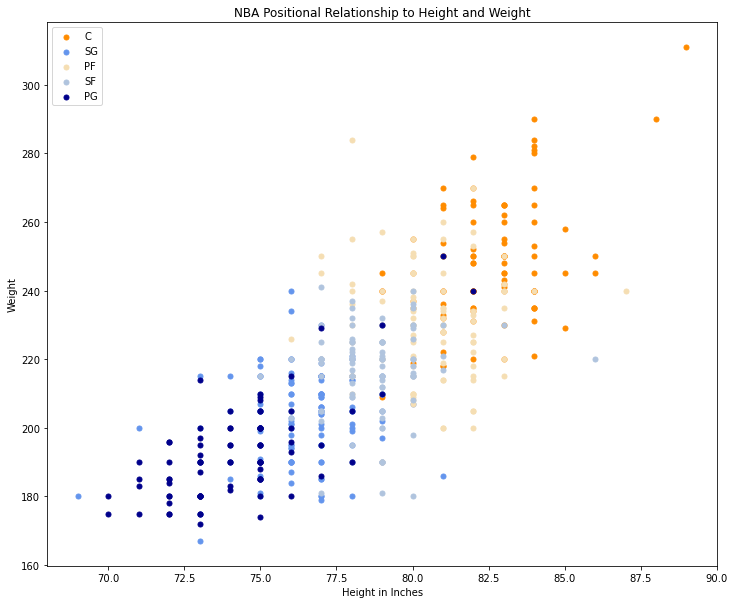

In [26]:
#Create individual dataframes for each of the traditional positions
C_df = nba_player_data.loc[nba_player_data['Pos'] == "C"]
SG_df = nba_player_data.loc[nba_player_data['Pos'] == "SG"]
PF_df = nba_player_data.loc[nba_player_data['Pos'] == "PF"]
SF_df = nba_player_data.loc[nba_player_data['Pos'] == "SF"]
PG_df = nba_player_data.loc[nba_player_data['Pos'] == "PG"]

#Create the figure size, labels, and title for the scatter plot
plt.figure(figsize=(12,10))
plt.xlabel("Height in Inches")
plt.ylabel("Weight")
plt.title("NBA Positional Relationship to Height and Weight")

#Plot each position onto the scatter plot
plt.scatter(C_df['Ht_Inches'], C_df['Wt'], label='C', s=25, c='darkorange')
plt.scatter(SG_df['Ht_Inches'], SG_df['Wt'], label='SG', s=25, c='cornflowerblue')
plt.scatter(PF_df['Ht_Inches'], PF_df['Wt'], label='PF', s=25, c='wheat')
plt.scatter(SF_df['Ht_Inches'], SF_df['Wt'], label='SF', s=25, c='lightsteelblue')
plt.scatter(PG_df['Ht_Inches'], PG_df['Wt'], label='PG', s=25, c='darkblue')

#Create a plot legend
plt.legend(loc='upper left')

#Show the scatter plot
plt.show()